In [5]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [6]:
df = pd.read_csv("List of Countries by Sugarcane Production.csv")

In [7]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [8]:
df.shape

(103, 7)

## data cleaning

In [10]:
df['Production (Tons)'] = df['Production (Tons)'].str.replace(".","")
df['Production per Person (Kg)'] = df['Production per Person (Kg)'].str.replace(".","").str.replace(",",".")
df['Acreage (Hectare)'] = df['Acreage (Hectare)'].str.replace(".","")
df['Yield (Kg / Hectare)'] = df['Yield (Kg / Hectare)'].str.replace(".","").str.replace(",",".")

In [11]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [12]:
df.rename(columns= {"Production (Tons)": "Production(Tons)"}, inplace = True)
df.rename(columns= {"Production per Person (Kg)": "Production_per_Person(Kg)"}, inplace = True)
df.rename(columns= {"Acrease (Hectare)": "Acrease(Hectare)"}, inplace = True)
df.rename(columns= {"Yield (Kg / Hectare)": "Yield(Kg/Hectare)"}, inplace = True)

In [13]:
df.head()

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage (Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [14]:
df.isna().sum()

Unnamed: 0                   0
Country                      0
Continent                    0
Production(Tons)             0
Production_per_Person(Kg)    0
Acreage (Hectare)            1
Yield(Kg/Hectare)            1
dtype: int64

In [15]:
df[df["Acreage (Hectare)"].isnull()]

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage (Hectare),Yield(Kg/Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [84]:
df = df.dropna().reset_index().drop("index", axis = 1)

In [86]:
df

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage (Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0
...,...,...,...,...,...,...
97,Spain,Europe,394.0,8.000,9.0,43596.5
98,Lebanon,Asia,97.0,16.000,3.0,28386.4
99,Singapore,Asia,50.0,9.000,2.0,25.0
100,Samoa,Oceania,12.0,6.000,1.0,11949.8


In [18]:
df.drop(["index", "Unnamed: 0"],axis = 1, inplace = True)

In [19]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage (Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [20]:
df.dtypes

Country                      object
Continent                    object
Production(Tons)             object
Production_per_Person(Kg)    object
Acreage (Hectare)            object
Yield(Kg/Hectare)            object
dtype: object

In [21]:
df["Production(Tons)"] = df["Production(Tons)"].astype(float)
df["Production_per_Person(Kg)"] = df["Production_per_Person(Kg)"].astype(float)
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].astype(float)
df["Yield(Kg/Hectare)"] = df["Yield(Kg/Hectare)"].astype(float)

In [22]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_Person(Kg)    float64
Acreage (Hectare)            float64
Yield(Kg/Hectare)            float64
dtype: object

In [23]:
df.nunique()

Country                      102
Continent                      6
Production(Tons)             102
Production_per_Person(Kg)    101
Acreage (Hectare)            101
Yield(Kg/Hectare)            102
dtype: int64

## Univariate Analysis

In [25]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage (Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


## How many countries produce sugarcane from each continent?

<Axes: xlabel='Continent'>

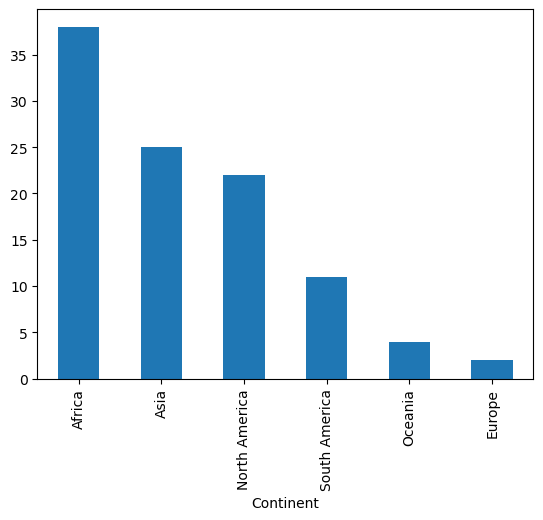

In [27]:
df["Continent"].value_counts().plot(kind = "bar")

## Distribution of the columns

C:\Users\suheb\AppData\Local\Temp\ipykernel_17828\3502380536.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production(Tons)"])
C:\Users\suheb\AppData\Local\Temp\ipykernel_17828\3502380536.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production_per_Person(Kg)"])
C:\Users\suhe

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Density'>

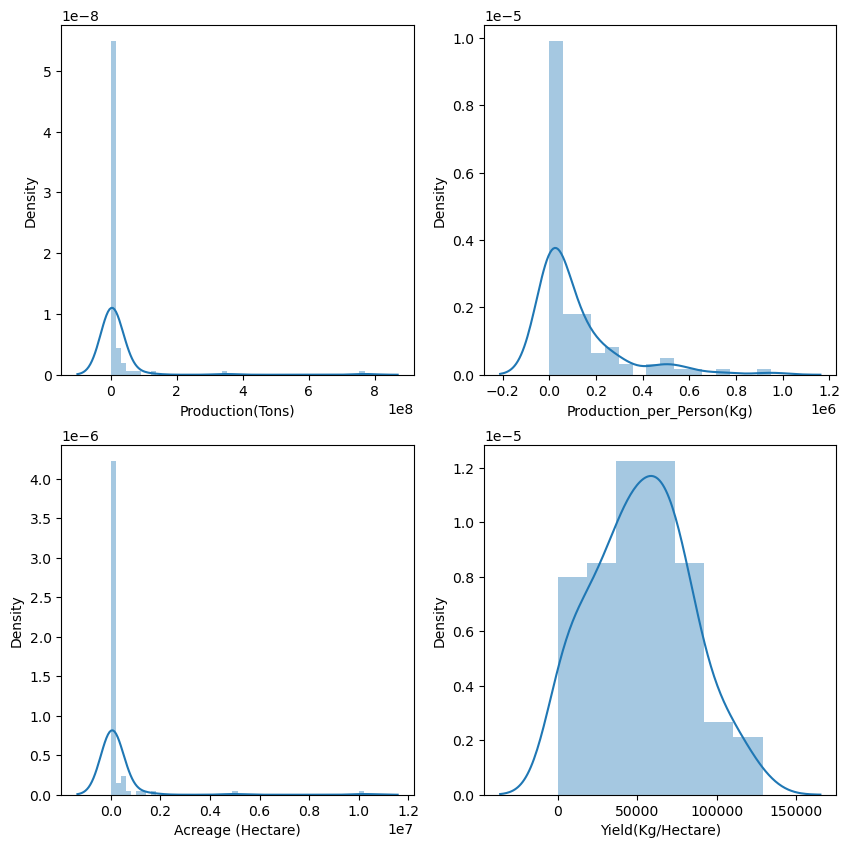

In [29]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.distplot(df["Production(Tons)"])
plt.subplot(2,2,2)
sns.distplot(df["Production_per_Person(Kg)"])
plt.subplot(2,2,3)
sns.distplot(df["Acreage (Hectare)"])
plt.subplot(2,2,4)
sns.distplot(df["Yield(Kg/Hectare)"])
             

## checking outliers

<Axes: ylabel='Yield(Kg/Hectare)'>

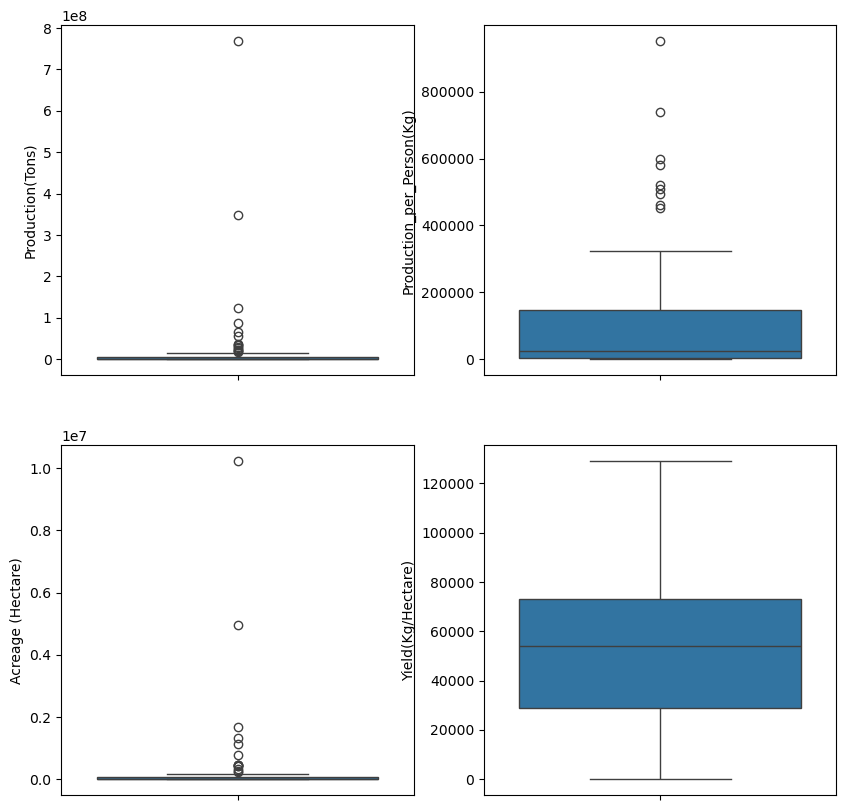

In [31]:
plt.figure(figsize= (10,10))
plt.subplot(2,2,1)
sns.boxplot(df["Production(Tons)"])
plt.subplot(2,2,2)
sns.boxplot(df["Production_per_Person(Kg)"])
plt.subplot(2,2,3)
sns.boxplot(df["Acreage (Hectare)"])
plt.subplot(2,2,4)
sns.boxplot(df["Yield(Kg/Hectare)"])

In [32]:
df.describe()

,Production(Tons),Production_per_Person(Kg),Acreage (Hectare),Yield(Kg/Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


## Bivariate Analysis

In [34]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage (Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


## Which country produces maximum sugarcane ?

In [36]:
df_new = df[["Country", "Production(Tons)"]].set_index("Country")

In [37]:
df_new

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


In [38]:
df_new["Production(Tons)_percent"] = df_new["Production(Tons)"]*100/df_new["Production(Tons)"].sum()

In [39]:
df_new

,Production(Tons),Production(Tons)_percent
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='Production(Tons)_percent'>

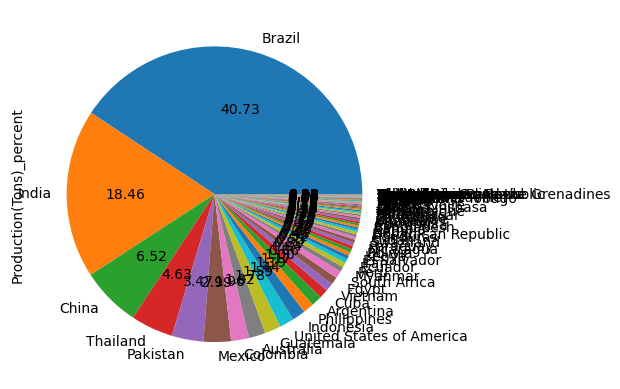

In [40]:
df_new["Production(Tons)_percent"].plot(kind = "pie",autopct = "%.2f")

<Axes: xlabel='Country'>

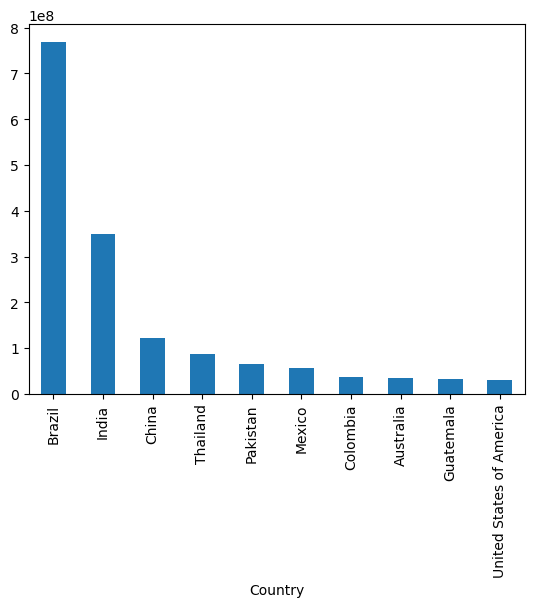

In [41]:
df_new["Production(Tons)"].head(10).plot(kind = "bar")

C:\Users\suheb\AppData\Local\Temp\ipykernel_17828\423166680.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


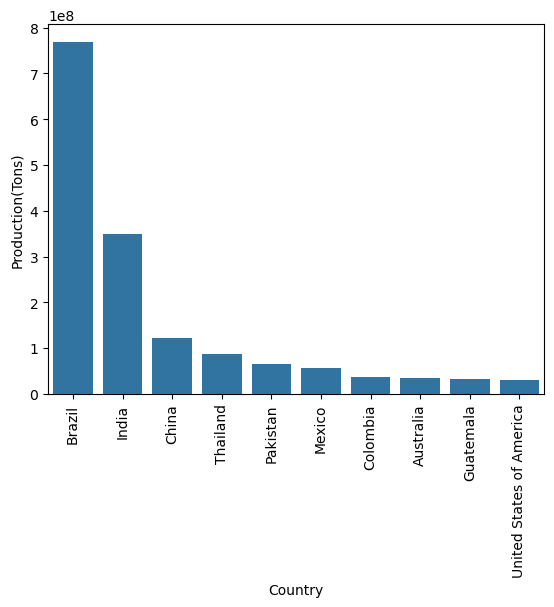

In [42]:
ax = sns.barplot(data = df.head(10), x = "Country", y = "Production(Tons)")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

In [43]:
df.head(10)

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage (Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0
5,Mexico,North America,56446821.0,452524.000,781054.0,7227.0
6,Colombia,South America,36951213.0,740075.000,416626.0,88691.5
7,Australia,Oceania,34403004.0,1373.406,447204.0,76929.1
8,Guatemala,North America,33533403.0,1938.114,25985.0,129049.3
9,United States of America,North America,29926210.0,91304.000,37053.0,80766.0


## which county has highest land?

C:\Users\suheb\AppData\Local\Temp\ipykernel_17828\1389359970.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation =90)


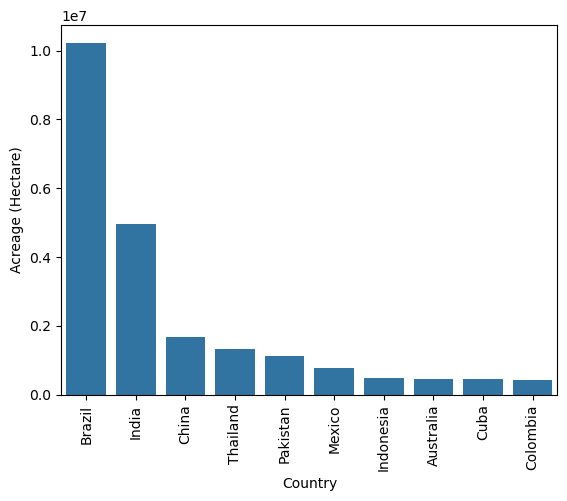

In [45]:
df_acr = df.sort_values("Acreage (Hectare)", ascending = False)
ax = sns.barplot(data = df_acr.head(10), x = "Country", y = "Acreage (Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

C:\Users\suheb\AppData\Local\Temp\ipykernel_17828\362022318.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = df_acr.head(10), x = "Country", y = "Acreage (Hectare)",palette=unique_colors)
C:\Users\suheb\AppData\Local\Temp\ipykernel_17828\362022318.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


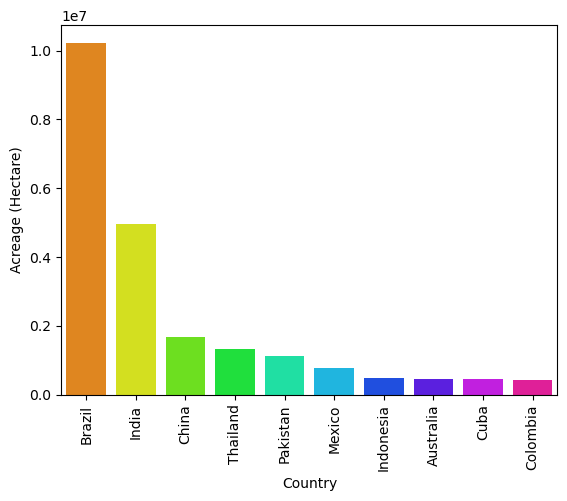

In [46]:
unique_colors = sns.color_palette("hsv", df_acr.head(10).shape[0])
df_acr = df.sort_values("Acreage (Hectare)", ascending = False)

ax = sns.barplot(data = df_acr.head(10), x = "Country", y = "Acreage (Hectare)",palette=unique_colors)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

## which country has highest yield per hectare?

C:\Users\suheb\AppData\Local\Temp\ipykernel_17828\3032041084.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = df_yield.head(10), x = "Country", y = "Yield(Kg/Hectare)",palette=unique_colors)
C:\Users\suheb\AppData\Local\Temp\ipykernel_17828\3032041084.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


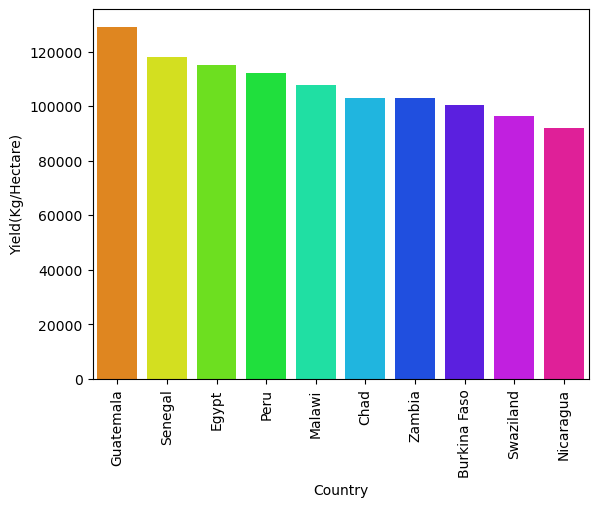

In [48]:
unique_colors = sns.color_palette("hsv", df_acr.head(10).shape[0])
df_yield = df.sort_values("Yield(Kg/Hectare)", ascending = False)
ax = sns.barplot(data = df_yield.head(10), x = "Country", y = "Yield(Kg/Hectare)",palette=unique_colors)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

## which country has highest production?

In [112]:
unique_colors = sns.color_palette("hsv", df_PpP.head(10).shape[0])
df_PpP = df.sort_values("Production_per_Person(Kg)", ascending = False)
ax = sns.barplot(data = df_PpP.head(10), x = "Country", y = "Production_per_Person(Kg)",palette=unique_colors)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

NameError: name 'df_PpP' is not defined

C:\Users\suheb\AppData\Local\Temp\ipykernel_17828\1543583186.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation =90)


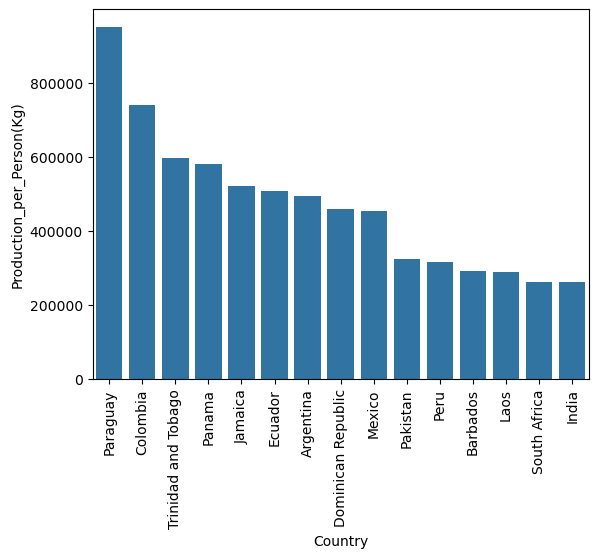

In [96]:
df_yield = df.sort_values("Production_per_Person(Kg)", ascending = False).head(15)
ax = sns.barplot(data = df_yield,  x= "Country", y = "Production_per_Person(Kg)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

## Correction

In [98]:
numeric_df = df.select_dtypes(include=[float, int])
numeric_df.corr()

,Production(Tons),Production_per_Person(Kg),Acreage (Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.015000,0.997550,0.132812
Production_per_Person(Kg),0.015000,1.000000,0.012557,0.017999
Acreage (Hectare),0.997550,0.012557,1.000000,0.113433
Yield(Kg/Hectare),0.132812,0.017999,0.113433,1.000000


<Axes: >

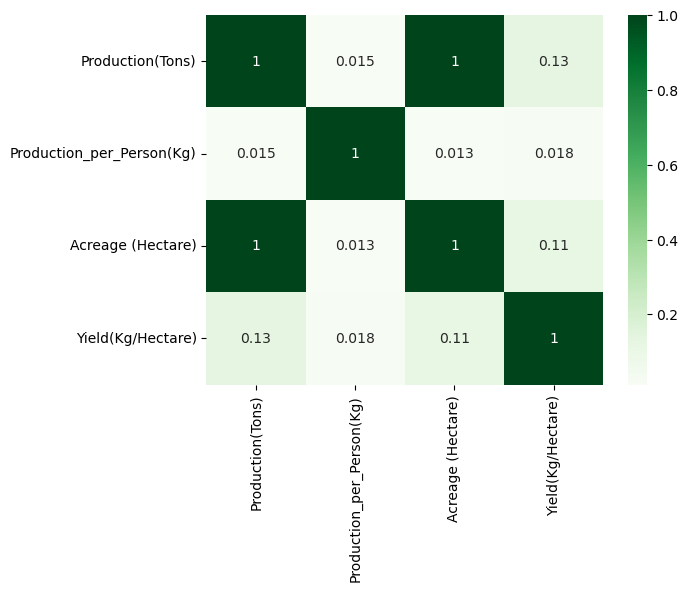

In [57]:
numeric_df = df.select_dtypes(include=[float, int])
sns.heatmap(numeric_df.corr(), annot = True, cmap = "Greens")

## Do countries with highest land produce more sugarcane?

<Axes: xlabel='Acreage (Hectare)', ylabel='Production(Tons)'>

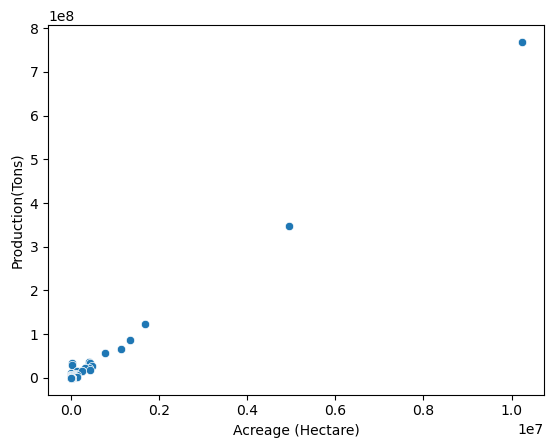

In [59]:
sns.scatterplot(data = df, x = "Acreage (Hectare)", y = "Production(Tons)")

## do countries which yield sugarcane per hectare produces more sugarcane in total?

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

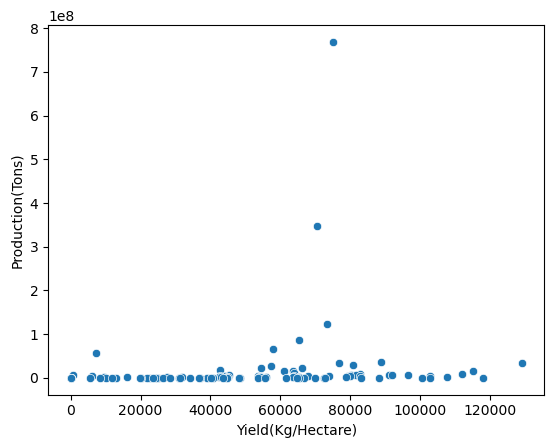

In [100]:
sns.scatterplot(data = df, x = "Yield(Kg/Hectare)", y = "Production(Tons)")

## Analysis for Continent

In [102]:
df_continent = df.groupby("Continent").sum()

In [104]:
df_continent

,Country,Production(Tons),Production_per_Person(Kg),Acreage (Hectare),Yield(Kg/Hectare)
Continent,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7


## which continent produces maximum sugarcane 

In [69]:
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

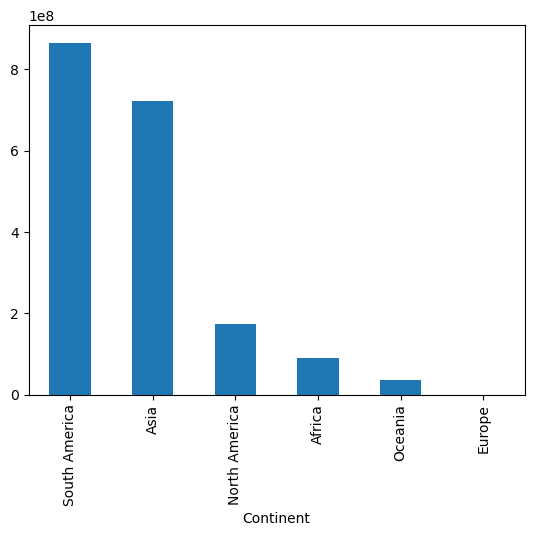

In [65]:
df_continent["Production(Tons)"].sort_values(ascending = False).plot(kind = "bar")

<Axes: xlabel='Continent'>

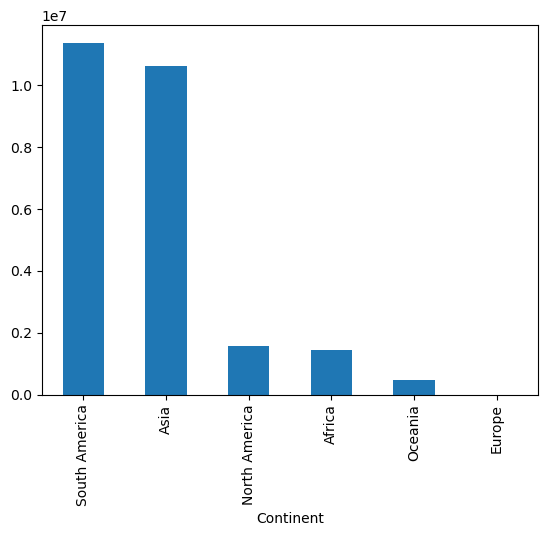

In [71]:
df_continent["Acreage (Hectare)"].sort_values(ascending = False).plot(kind = "bar")

## do number of counties in a continent effects production of sugarcane?

In [74]:
df_continent["number_of_countries"] = df.groupby("Continent").count()["Country"]

In [76]:
df_continent

,Country,Production(Tons),Production_per_Person(Kg),Acreage (Hectare),Yield(Kg/Hectare),number_of_countries
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1,4
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7,11


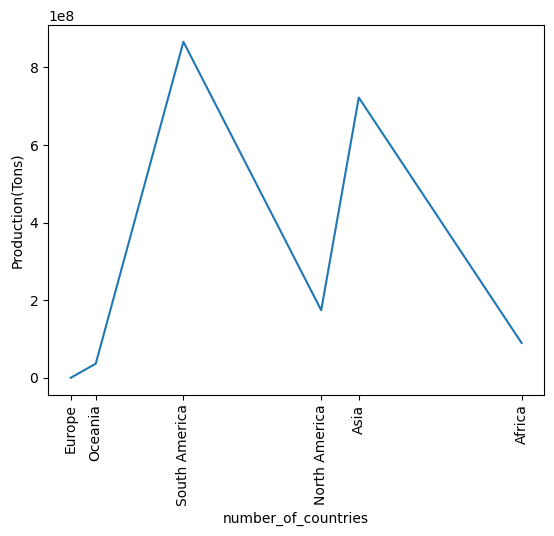

In [78]:
continent_names = df_continent.index.to_list()
sns.lineplot(data = df_continent, x = "number_of_countries", y = "Production(Tons)")
plt.xticks(df_continent["number_of_countries"], continent_names, rotation= 90)
plt.show()

## Do continent with highest land produces more sugarcane?

<Axes: xlabel='Acreage (Hectare)', ylabel='Production(Tons)'>

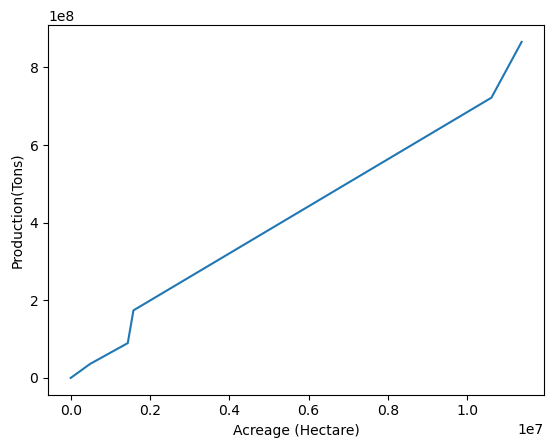

In [110]:
sns.lineplot(data = df_continent,x = "Acreage (Hectare)", y= "Production(Tons)" )

## Production distrubution by continent

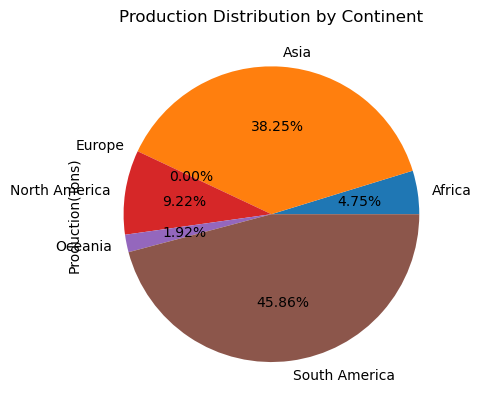

In [106]:
df_continent["Production(Tons)"].plot(kind = "pie", autopct = "%.2f%%")
plt.title('Production Distribution by Continent')
plt.show()

## Correlation for continent